# EDA

In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline

file_dir=os.getcwd()[:-6]+ 'Models/'
df = pd.read_csv(file_dir+'final_daily.csv')
df = df[['date','price','demand','avg_temp']]

We begin our analysis by examining the variables collected for this study: date, price, demand, and average temperature. Date is a categorical variable that represents the date of the observation, while the other variables are continuous and measured in units of dollars/MWh, MWh, and degrees Celsius, respectively.

In [2]:
df.head()

,date,price,demand,avg_temp
0,2020-01-01,0.575217,324937,5.158036
1,2020-01-02,0.010000,362395,4.493006
2,2020-01-03,16.015000,369431,5.064583
3,2020-01-04,15.604583,361928,4.458333
4,2020-01-05,5.554167,359417,4.066815


Looking at the summary statistics of the variables, we find that there are no missing values in the data. However, the price variable has some extreme values, with some daily prices reaching as high as 126 dollars/MWh and even negative values. These outliers could be due to factors such as sudden changes in supply or demand, or errors in the measurement or recording of the data. 

In [3]:
df.describe()

,price,demand,avg_temp
count,1096.000000,1096.000000,1096.000000
mean,28.103917,368271.472628,6.356669
std,21.629059,39975.102999,1.995596
min,-0.642083,268184.000000,1.331250
25%,12.313437,337678.000000,4.949628
50%,21.053958,367054.500000,6.420685
75%,40.576042,396921.750000,7.661830
max,126.465417,490924.000000,15.230060


Next, we examine the cross-correlations between the variables. We find that there is a moderate positive cross-correlation between price and demand, with a peak at lag 0 of 0.5, indicating that higher demand tends to drive up the price of electricity concurrently. The cross-correlations between price and demand exhibit strong seasonality, suggesting a recurring pattern in their relationship.

The cross-correlations between price and temperature show a negative relationship, with the maximum value of -0.2 occurring at lag 250. This relationship also demonstrates strong annual seasonality, indicating that the influence of temperature on price follows a consistent pattern throughout the year.

As for the relationship between demand and temperature, the cross-correlation peaks at lag 200 with a value of 0.15, suggesting a relatively weak but noticeable relationship between the two variables. The cross-correlation between demand and temperature also exhibits strong annual seasonality, with an opposite direction compared to the cross-correlation between price and demand. This implies that the influence of temperature on demand follows a distinct seasonal pattern, contrasting with the relationship between price and demand.

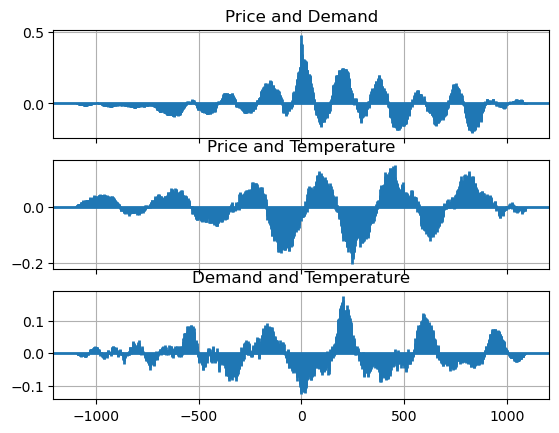

In [25]:
x=df['price']
y=df['demand']
z=df['avg_temp']

fig, [ax1, ax2, ax3] = plt.subplots(3, 1, sharex=True)

ax1.xcorr(x, y, usevlines=True, maxlags=None, normed=True, lw=2,detrend =mlab.detrend_mean)
ax1.grid(True)
ax1.set_title('Price and Demand')

import matplotlib.mlab as mlab
ax2.xcorr(x, z, usevlines=True, maxlags=None, normed=True, lw=2, detrend =mlab.detrend_mean )
ax2.grid(True)
ax2.set_title('Price and Temperature')

ax3.xcorr(z, y, usevlines=True, maxlags=None, normed=True, lw=2, detrend =mlab.detrend_mean)
ax3.grid(True)
ax3.set_title('Demand and Temperature')

plt.show()

Histograms of price, demand, and temperature reveal interesting distribution patterns. The shapes of demand and temperature are similar to a normal distribution, while the price distribution is heavily skewed to the right, with a large number of observations having prices less than 20 dollars/MWh and gradually decreasing as the price increases. This suggests that electricity prices are generally low, with occasional spikes due to various factors.

Text(0.5, 1.0, 'Temperature Hist')

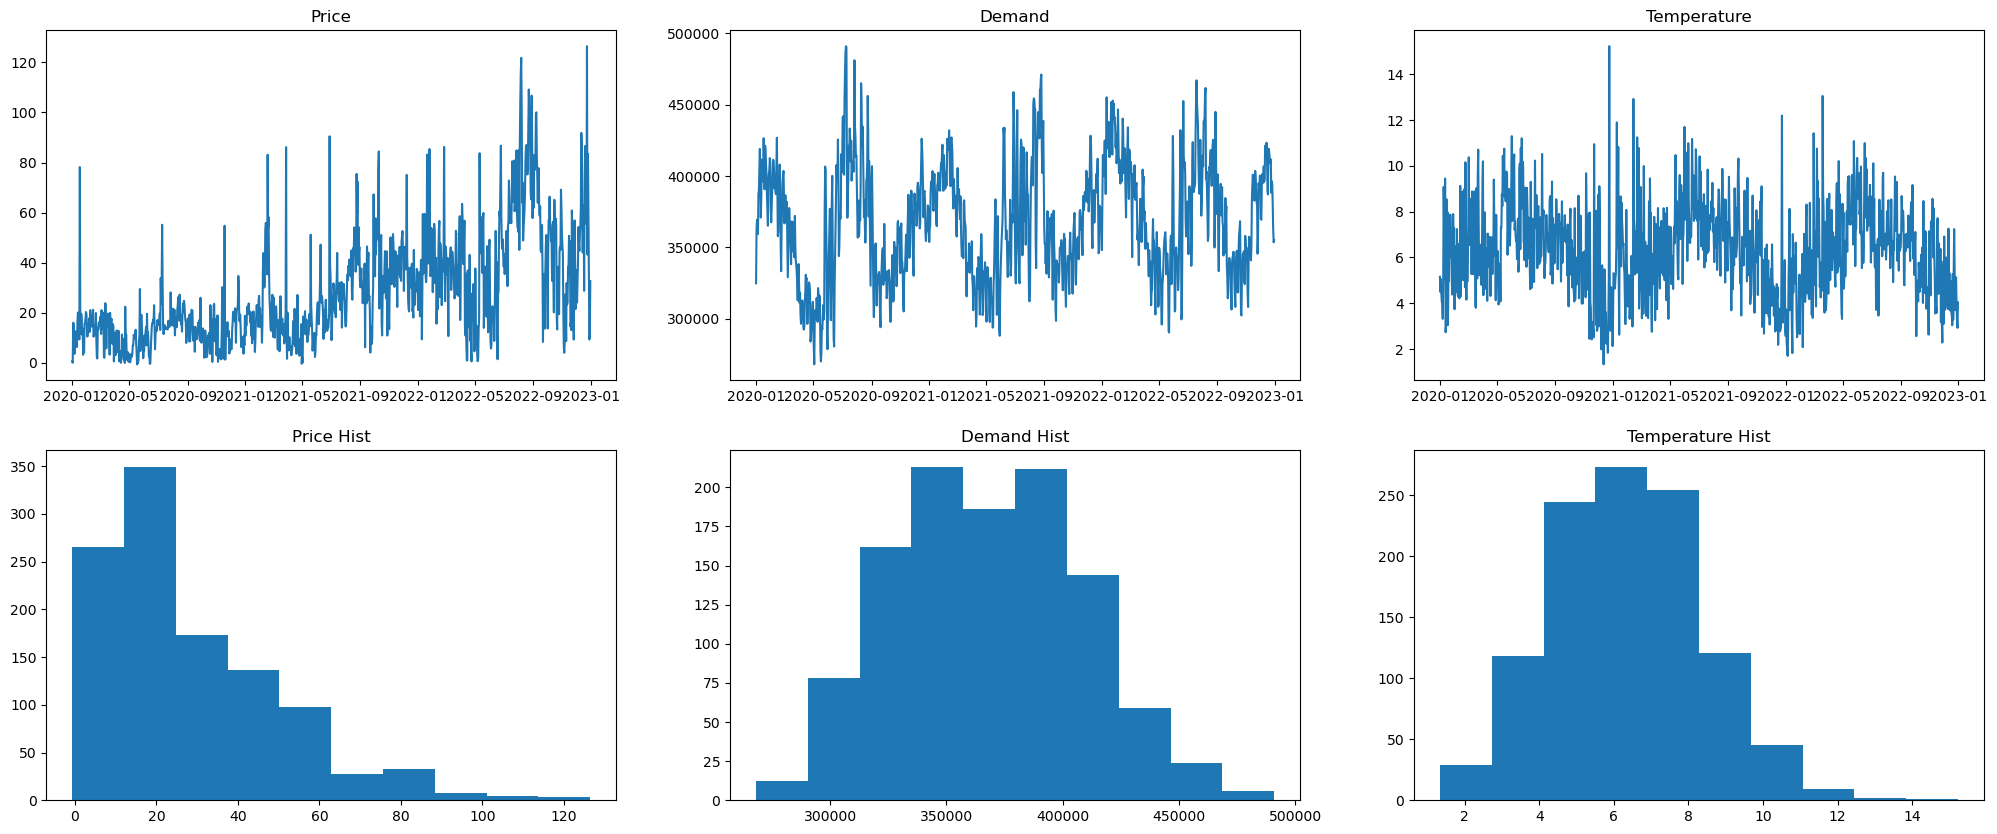

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(25,10))

ax[0, 0].plot(pd.to_datetime(df['date']),df['price'])
ax[0, 0].set_title("Price")

ax[1, 0].hist(df['price'])
ax[1, 0].set_title("Price Hist")

ax[0, 1].plot(pd.to_datetime(df['date']),df['demand'])
ax[0, 1].set_title("Demand")

ax[1, 1].hist(df['demand'])
ax[1, 1].set_title("Demand Hist")

ax[0, 2].plot(pd.to_datetime(df['date']),df['avg_temp'])
ax[0, 2].set_title("Temperature")

ax[1, 2].hist(df['avg_temp'])
ax[1, 2].set_title("Temperature Hist")

To explore the seasonal patterns in the data, we plot the average daily price, demand, and temperature over time, as well as their autocorrelation functions (ACF). We observe that both demand and temperature exhibit strong annual trends. Demand is high during both summer months (June to September) due to increased use of air conditioning and winter months (December to February) because of heating. Temperature, on the other hand, peaks in the summer months and troughs in the winter months. In contrast, the price of electricity does not display a clear annual trend but rather an increasing trend over time. The price appears to be more volatile, with occasional spikes occurring throughout the year.

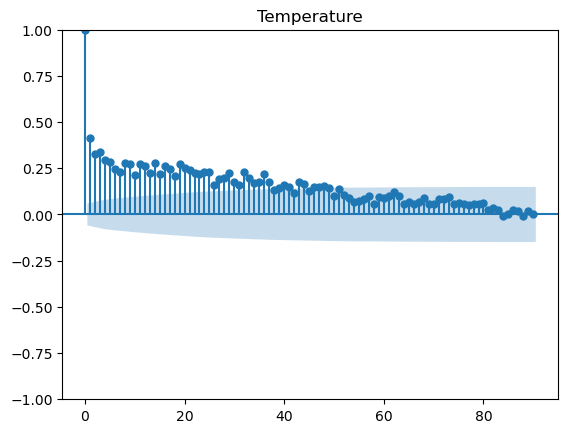

In [6]:
plot_acf(df['avg_temp'],lags=90)
plt.title('Temperature')
plt.show()

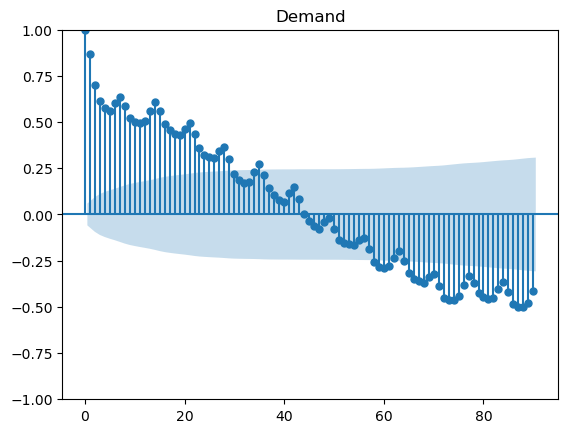

In [7]:
plot_acf(df['demand'],lags=90)
plt.title('Demand')
plt.show()

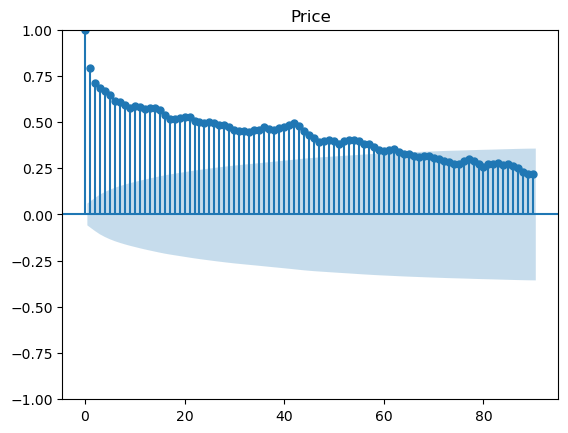

In [8]:
plot_acf(df['price'],lags=90)
plt.title('Price')
plt.show()

Overall, these exploratory data analysis techniques provide us with a better understanding of the patterns and relationships in our data and help us identify potential issues or trends that may need to be addressed in our subsequent analysis. The presence of annual trends in demand and temperature, the skewed distribution of electricity prices, and the increasing trend in price all provide valuable insights for the selection and development of appropriate forecasting models.